NBM2 — NBM2 TASK 1: MULTIPLE REGRESSION FOR PREDICTIVE MODELING

# ENVIRONMENT

In [660]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from itertools import product
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from scipy.stats import logistic
from statsmodels.formula.api import logit
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option('precision', 3)

cmap = "mako"
sns.set(font_scale=2, palette=cmap)

In [16]:
df = pd.read_csv("../TASK 1 - MULTIPLE REGRESSION FOR PREDICTIVE MODELING/src/medical_clean.csv")

In [31]:
df.shape

(10000, 50)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [70]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [12]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# √ Part I: Research Question 
---

## A.  Describe the purpose of this data analysis by doing the following:



### √ 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.
*The summary includes 1 research question that is relevant to a realistic organizational situation and can be addressed using the selected data set and multiple regression.*
<br />*The scenarios described on page 1 of both the churn dataset and the medical dataset are just examples. Even though these say, "You have been asked to..." it does not mean that you should use the example scenario as the basis for your analysis in D208. In fact, both example scenarios use a categorical dependent variable, which is appropriate for logistic regression but not for linear regression because linear regression requires a continuous dependent variable. Thus, you will need to select a continuous variable for your dependent variable for the linear regression.*

**Can we predict a patient's additional medical charges based on patient demographics and pre-existing health conditions?**

### √ 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.
*The submission defines the objectives or goals of the data analysis, and the objectives or goals are reasonable for the scope of the scenario and are represented in the available data.*

- **The objective this data analysis is to:**
    - **model a linear relationship between Additional Charges (dependent variable) and multiple independent variables related to a patient's demographics and health conditions**
    - **use several explanatory variables to predict a patient's additional charges**
    - **additional charges can occur for a multitude of reason, want what if any relationship exists between the patient data's and a patient's additional charges**
    - **ultimately the goal is to provide patients and healthcare providers with more accurate cost estimates**.
        - **also provide a way to inform patients of what — if any — factors may result in additional medical charges.**    

--- 
- model a linear relationship between dependent variable (re-admission) and independent variables
- use several explanatory variables to predict outcome of response variable
- necessary because sometimes multiple factors can predict and event out
- "In many cases, using only one explanatory variable limits the accuracy of predictions. To truly master linear regression, you need to be able to fit regression models with multiple explanatory variables." - realpython
- "The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them."
- "Similarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on." - realpython


# √Part II: Method Justification
---

## B.  Describe multiple regression methods by doing the following:

### √1.  Summarize the assumptions of a multiple regression model.
*The submission accurately summarizes the assumptions of a multiple regression model.*



- There are several assumptions of a multiple regression models:
    - There is a linear relationship between the dependent variable and the independent variables.
    - The explantory variables are not highly correlated.
    - Observations are selected independently and randomly from the population
    - Residuals should be normally distributed with a mean of 0.
    - Explanatory power should increase with an increase in explanatory variables.
    - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/





### √2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.
*The submission describes the benefits of using the tool(s) chosen in support of various phases of the multiple regression analysis, and the benefits logically align with the goal of the analysis.*



- Jupyter Notebooks
    - I chose this technology because I’m familiar with it and it offers seamless integration of python, data visualizations, and text documentation. Ultimately this offers human-readable and executable documents used to perform data analysis (Ingargiola, A., & contributors, 2015).
- Numpy
    - I chose this because I’m familiar with it, and Numpy serves as the de-facto Python Numerical programming package. Numpy is easy to use, offers extensive computing tools, and is optimized to work well on large data sets.
    - "The package NumPy is a fundamental Python scientific package that allows many high-performance operations on single- and multi-dimensional arrays. It also offers many mathematical routines. Of course, it’s open source.""The package NumPy is a fundamental Python scientific package that allows many high-performance operations on single- and multi-dimensional arrays. It also offers many mathematical routines. Of course, it’s open source."
- Matplotlib
    - Matplotlib is a comprehensive library for creating visualizations in Python. I chose this because I’m familiar with it. Matplotlib offers a diverse set of visualization offers, but we’re mainly going to leverage its plotting functionality to better understand our data set. 
-Jupyter Notebooks
    I chose this technology because I’m familiar with it and it offers seamless integration of python, data visualizations, and text documentation. Ultimately this offers human-readable and executable documents used to perform data analysis (Ingargiola, A., & contributors, 2015).
- Python
    - I'm familiar with Python and currently use it every day at work. I’m familiar with the programming ecosystem, its libraries, and its tools.
- Pandas
    - I chose this because I’m familiar with it. Pandas is well-regarded for data manipulation and analysis within Python. More specifically, it provides a user-friendly API for interacting with, manipulating, and performing operations on various data structures and tabular data (Pandas, 2022). 
- Scikit-Learn
    - Scikit-learn is a machine learning library that provides tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities (scikit-learn developers, 2021). We’ll use this package’s modules mainly during the PCA (Principal Component Analysis) stage to help reduce the number of data set columns.
    - "The package scikit-learn is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. Like NumPy, scikit-learn is also open source." - realpython"The package scikit-learn is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. Like NumPy, scikit-learn is also open source." - realpython    
- Seaborn
    - Like Matplotlib, I chose Seaborn because I’m familiar with it. Similarly, Seaborn is based on matplotlib and offers features to make data visualizations more attractive.
- Statsmodel
    - "If you want to implement linear regression and need the functionality beyond the scope of scikit-learn, you should consider statsmodels. It’s a powerful Python package for the estimation of statistical models, performing tests, and more. It’s open source as well." - rp"If you want to implement linear regression and need the functionality beyond the scope of scikit-learn, you should consider statsmodels. It’s a powerful Python package for the estimation of statistical models, performing tests, and more. It’s open source as well." - rp
    - "statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org."

### 3.  Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.
*The submission accurately explains why multiple regression is an appropriate technique to analyze the research question from Part I.*


- "In many cases, using only one explanatory variable limits the accuracy of predictions. To truly master linear regression, you need to be able to fit regression models with multiple explanatory variables." - realpython
- "Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on."
- "Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent the experience or gender impact salaries."
- "Regression is also useful when you want to forecast a response using a new set of predictors."
- "Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results."
---
- Ordinary Least Squares
- "Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. They define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ. This function should capture the dependencies between the inputs and output sufficiently well."
- "To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares."


# Part III: Data Preparation
---

## C.  Summarize the data preparation process for multiple regression analysis by doing the following:



### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.
*The submission describes the data preparation goals and the data manipulations that will be used to achieve the goals. The goals and manipulations align with each other and with multiple regression analysis and the research question.*


In [768]:
df = pd.read_csv("../TASK 1 - MULTIPLE REGRESSION FOR PREDICTIVE MODELING/src/medical_clean.csv")

#### Data Prep Goals and Data Manipulations
There are several data preparation goals and manipulations required before creating the initial linear regression model:
- First we'll remove unneeded data features such geographic information, survey responses and other metadata and IDs.
- Next we'll check for missing values and remove the records or impute the values using a mean value. 
- By default pandas will interpret nominal string values as "Object" data. We'll convert these data features to categories. Once we complete that, we'll one-hot encode these categorical data features into multiple columns. To do this we'll find the number of unique values for the data feature and transform those values into K-1 columns using pandas get_dummies()

##### Drop Irrelevant Columns

In [769]:
cols = [
        'Additional_charges',
        'Age',
        'Allergic_rhinitis',
        'Anxiety',
        'Area',
        'Arthritis',
        'Asthma',
        'BackPain',
        'Children',
        'Complication_risk',
        'Diabetes',
        'Doc_visits',
        'Full_meals_eaten',
        'Gender',
        'HighBlood',
        'Hyperlipidemia',
        'Income',
        'Initial_admin',
        'Initial_days',
        'Marital',
        'Overweight',
        'Population',
        'ReAdmis',
        'Reflux_esophagitis',
        'Services',
        'Soft_drink',
        'Stroke',
        'TotalCharge',
        'VitD_levels',
        'vitD_supp'
    ]

df = df[sorted(cols)]

##### Drop Missing Values

In [770]:
df = df.dropna()
                  
# Python tip to convert all of the NA values to the mean of the remaining values
display(pd.DataFrame(df.isnull().sum(), columns=["# Missing Values"]).T)

assert df.isnull().sum().sum() == 0

,Additional_charges,Age,Allergic_rhinitis,Anxiety,Area,Arthritis,Asthma,BackPain,Children,Complication_risk,Diabetes,Doc_visits,Full_meals_eaten,Gender,HighBlood,Hyperlipidemia,Income,Initial_admin,Initial_days,Marital,Overweight,Population,ReAdmis,Reflux_esophagitis,Services,Soft_drink,Stroke,TotalCharge,VitD_levels,vitD_supp
# Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Convert Object to Categorical Datatype

In [771]:
for col in df.select_dtypes("object").columns:
    print(f"Converting feature: '{col}' to category datatype")
    df[col] = df[col].astype("category")

Converting feature: 'Allergic_rhinitis' to category datatype
Converting feature: 'Anxiety' to category datatype
Converting feature: 'Area' to category datatype
Converting feature: 'Arthritis' to category datatype
Converting feature: 'Asthma' to category datatype
Converting feature: 'BackPain' to category datatype
Converting feature: 'Complication_risk' to category datatype
Converting feature: 'Diabetes' to category datatype
Converting feature: 'Gender' to category datatype
Converting feature: 'HighBlood' to category datatype
Converting feature: 'Hyperlipidemia' to category datatype
Converting feature: 'Initial_admin' to category datatype
Converting feature: 'Marital' to category datatype
Converting feature: 'Overweight' to category datatype
Converting feature: 'ReAdmis' to category datatype
Converting feature: 'Reflux_esophagitis' to category datatype
Converting feature: 'Services' to category datatype
Converting feature: 'Soft_drink' to category datatype
Converting feature: 'Stroke' t

In [772]:
cats_df = df.select_dtypes("category")

nunique_df = pd.DataFrame({'Unique Values': cats.nunique(), "K-1 Levels": cats.nunique()-1})

for num_unique in cats.nunique():
    assert num_unique > 1
    
nunique_df

,Unique Values,K-1 Levels
Allergic_rhinitis,2,1
Anxiety,2,1
Area,3,2
Arthritis,2,1
Asthma,2,1
BackPain,2,1
Complication_risk,3,2
Diabetes,2,1
Gender,3,2
HighBlood,2,1


##### Title Case Feature Labels

In [773]:
df.columns = [c.title() if "_" in c else c for c in df.columns]
df.columns

Index(['Additional_Charges', 'Age', 'Allergic_Rhinitis', 'Anxiety', 'Area',
       'Arthritis', 'Asthma', 'BackPain', 'Children', 'Complication_Risk',
       'Diabetes', 'Doc_Visits', 'Full_Meals_Eaten', 'Gender', 'HighBlood',
       'Hyperlipidemia', 'Income', 'Initial_Admin', 'Initial_Days', 'Marital',
       'Overweight', 'Population', 'ReAdmis', 'Reflux_Esophagitis', 'Services',
       'Soft_Drink', 'Stroke', 'TotalCharge', 'Vitd_Levels', 'Vitd_Supp'],
      dtype='object')

##### Convert categorical variable into dummy/indicator variables.


In [774]:
ctg_columns = df.select_dtypes("category").columns
df = pd.get_dummies(df, columns=ctg_columns, dummy_na=False, drop_first=True, prefix_sep='_')

##### Sort Features Alphabetically

In [775]:
df = df[sorted(df.columns)]
df.head(1).T

,0
Additional_Charges,"17,939.403"
Age,53.000
Allergic_Rhinitis_Yes,1.000
Anxiety_Yes,1.000
Area_Suburban,1.000
Area_Urban,0.000
Arthritis_Yes,1.000
Asthma_Yes,1.000
BackPain_Yes,1.000
Children,1.000


In [776]:
df.describe()

,Additional_Charges,Age,Allergic_Rhinitis_Yes,Anxiety_Yes,Area_Suburban,Area_Urban,Arthritis_Yes,Asthma_Yes,BackPain_Yes,Children,Complication_Risk_Low,Complication_Risk_Medium,Diabetes_Yes,Doc_Visits,Full_Meals_Eaten,Gender_Male,Gender_Nonbinary,HighBlood_Yes,Hyperlipidemia_Yes,Income,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Initial_Days,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Overweight_Yes,Population,ReAdmis_Yes,Reflux_Esophagitis_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,Soft_Drink_Yes,Stroke_Yes,TotalCharge,Vitd_Levels,Vitd_Supp
count,"10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
mean,"12,934.529",53.512,0.394,0.322,0.333,0.330,0.357,0.289,0.411,2.097,0.212,0.452,0.274,5.012,1.001,0.477,0.021,0.409,0.337,"40,490.495",0.506,0.244,34.455,0.202,0.198,0.199,0.204,0.709,"9,965.254",0.367,0.413,0.122,0.313,0.038,0.258,0.199,"5,312.173",17.964,0.399
std,"6,542.602",20.639,0.489,0.467,0.471,0.470,0.479,0.453,0.492,2.164,0.409,0.498,0.446,1.046,1.008,0.499,0.145,0.492,0.473,"28,521.153",0.500,0.429,26.309,0.402,0.399,0.399,0.403,0.454,"14,824.759",0.482,0.492,0.328,0.464,0.191,0.437,0.399,"2,180.394",2.017,0.629
min,"3,125.703",18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,154.080,0.000,0.000,1.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"1,938.312",9.806,0.000
25%,"7,986.488",36.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,"19,598.775",0.000,0.000,7.896,0.000,0.000,0.000,0.000,0.000,694.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"3,179.374",16.626,0.000
50%,"11,573.978",53.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,5.000,1.000,0.000,0.000,0.000,0.000,"33,768.420",1.000,0.000,35.836,0.000,0.000,0.000,0.000,1.000,"2,769.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,"5,213.952",17.951,0.000
75%,"15,626.490",71.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,0.000,1.000,1.000,6.000,2.000,1.000,0.000,1.000,1.000,"54,296.402",1.000,0.000,61.161,0.000,0.000,0.000,0.000,1.000,"13,945.000",1.000,1.000,0.000,1.000,0.000,1.000,0.000,"7,459.700",19.348,1.000
max,"30,566.070",89.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10.000,1.000,1.000,1.000,9.000,7.000,1.000,1.000,1.000,1.000,"207,249.100",1.000,1.000,71.981,1.000,1.000,1.000,1.000,1.000,"122,814.000",1.000,1.000,1.000,1.000,1.000,1.000,1.000,"9,180.728",26.394,5.000


##### Standardize Numeric Variables

In [785]:
"""
The preprocessing.scale(data) function can be used to standardize the data values to a value having mean equivalent to zero and standard deviation as 1.


"""
# separate the independent and dependent variables
# X_data = data.data
# target = data.target

from sklearn import preprocessing
# https://www.askpython.com/python/examples/standardize-data-in-python

# standard_df = preprocessing.scale(X_data)

# exclude columns you don't want
x_cols = df.columns[~df.columns.isin(['Additional_Charges'])]
X_data = df[x_cols]
standard_df = preprocessing.scale(X_data)

pd.DataFrame(standard_df, columns=x_cols)

,Age,Allergic_Rhinitis_Yes,Anxiety_Yes,Area_Suburban,Area_Urban,Arthritis_Yes,Asthma_Yes,BackPain_Yes,Children,Complication_Risk_Low,Complication_Risk_Medium,Diabetes_Yes,Doc_Visits,Full_Meals_Eaten,Gender_Male,Gender_Nonbinary,HighBlood_Yes,Hyperlipidemia_Yes,Income,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,Initial_Days,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Overweight_Yes,Population,ReAdmis_Yes,Reflux_Esophagitis_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,Soft_Drink_Yes,Stroke_Yes,TotalCharge,Vitd_Levels,Vitd_Supp
0,-0.025,1.240,1.453,1.416,-0.702,1.341,1.567,1.196,-0.507,-0.519,1.102,1.629,0.945,-0.993,1.048,-0.148,1.202,-0.713,1.616,0.988,-0.567,-0.907,-0.504,-0.497,-0.498,-0.507,-1.562,-0.473,-0.761,-0.840,-0.374,-0.675,-0.199,-0.589,-0.499,-0.727,0.584,-0.635
1,-0.122,-0.806,-0.688,-0.706,1.424,-0.746,-0.638,-0.836,0.417,-0.519,-0.908,-0.614,-0.968,0.991,-0.955,-0.148,1.202,-0.713,0.221,0.988,-0.567,-0.735,1.986,-0.497,-0.498,-0.507,0.640,0.090,-0.761,1.191,-0.374,1.482,-0.199,-0.589,-0.499,-0.513,0.484,0.956
2,-0.025,-0.806,-0.688,1.416,-0.702,-0.746,-0.638,-0.836,0.417,-0.519,1.102,1.629,-0.968,-0.001,-0.955,-0.148,1.202,-0.713,-0.916,-1.012,-0.567,-1.128,-0.504,-0.497,-0.498,1.972,0.640,0.483,-0.761,-0.840,-0.374,-0.675,-0.199,-0.589,-0.499,-1.320,0.046,-0.635
3,1.187,-0.806,-0.688,1.416,-0.702,1.341,1.567,-0.836,-0.969,-0.519,1.102,-0.614,-0.968,-0.001,1.048,-0.148,-0.832,-0.713,-0.026,-1.012,-0.567,-1.245,1.986,-0.497,-0.498,-0.507,-1.562,-0.526,-0.761,1.191,-0.374,-0.675,-0.199,-0.589,2.004,-1.461,-0.688,-0.635
4,-1.527,1.240,-0.688,-0.706,-0.702,-0.746,-0.638,-0.836,-0.507,1.925,-0.908,-0.614,-0.012,-0.993,-0.955,-0.148,-0.832,1.402,-1.377,-1.012,-0.567,-1.262,-0.504,-0.497,-0.498,1.972,-1.562,-0.316,-0.761,-0.840,2.676,-0.675,-0.199,1.698,-0.499,-1.467,-0.260,2.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.382,-0.806,1.453,-0.706,1.424,-0.746,-0.638,-0.836,-0.045,-0.519,1.102,-0.614,-0.968,0.991,1.048,-0.148,1.202,-0.713,0.192,0.988,-0.567,0.650,-0.504,-0.497,-0.498,1.972,-1.562,-0.351,-0.761,1.191,-0.374,1.482,-0.199,-0.589,-0.499,0.706,-0.488,0.956
9996,1.623,-0.806,-0.688,-0.706,1.424,1.341,1.567,-0.836,0.879,-0.519,1.102,1.629,-0.012,-0.993,1.048,-0.148,1.202,-0.713,-0.894,-1.012,-0.567,1.300,-0.504,-0.497,-0.498,1.972,0.640,-0.588,1.314,-0.840,2.676,-0.675,-0.199,-0.589,-0.499,1.114,0.105,-0.635
9997,-0.412,1.240,1.453,-0.706,-0.702,-0.746,-0.638,-0.836,0.417,-0.519,-0.908,-0.614,-0.968,0.991,-0.955,-0.148,1.202,-0.713,0.892,-1.012,-0.567,1.357,-0.504,-0.497,2.008,-0.507,0.640,-0.636,1.314,-0.840,-0.374,1.482,-0.199,1.698,-0.499,1.360,-0.414,-0.635
9998,-0.509,-0.806,-0.688,-0.706,-0.702,-0.746,-0.638,1.196,0.417,-0.519,1.102,-0.614,-0.012,0.991,1.048,-0.148,-0.832,-0.713,-0.378,0.988,-0.567,1.099,-0.504,-0.497,-0.498,-0.507,0.640,-0.654,1.314,-0.840,-0.374,-0.675,-0.199,-0.589,-0.499,1.070,0.965,0.956


#### Data Manipulations
- use VIF to determine multicollinearity among independent variables 
- one hot encoding for categorical columns
- filter the IVs for the ones that have p-values below the alpha level. Those are the IVs to use in reduced model and eventually the equation.

In [620]:
def linear_reg(data, target_col):
    y_cols = [target_col]
    X = data
    y = dummy_df[y_cols]
    X = X.drop(columns=y_cols)

    return linear_model.LinearRegression().fit(X, y), X, y

reg, X, y = linear_reg(data=dummy_df, target_col="Additional_charges")
reg.score(X,y), reg.coef_, reg.intercept_

(0.9387320976986356,
 array([[ 8.08835943e-04,  1.41341658e+01,  2.25773171e+02,
          1.22283717e-04, -1.17388224e+01, -1.80153084e+01,
          1.32455597e+01, -8.48621725e+00, -9.04143777e+06,
          1.10345053e+05, -4.03252484e+01, -7.09352223e+01,
          4.28726431e+01,  4.73055429e+01,  1.01651617e+01,
          9.46137967e+00,  1.57066311e+02,  2.89467945e+01,
          1.06289132e+02,  2.32391003e+01, -5.65318627e+07,
         -8.65494146e+01, -1.23856798e+07,  3.61792115e+02,
          4.56265447e+07,  4.56266667e+07,  3.61116601e+01,
         -7.93947965e+06, -8.29825237e+06, -1.03713381e+07,
         -9.39546306e+06, -9.50225823e+06, -6.68482634e+06,
         -6.58538844e+06,  5.40362429e+01, -3.16579051e+01,
          2.95561240e+01,  1.14046274e+02]]),
 array([-2.50395324e+08]))

In [621]:
category = "ReAdmis"
# category = "Services"
# 'Overweight', 'Arthritis', 'Diabetes',
#        'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
#        'Reflux_esophagitis', 'Asthma', 'Services',

sample_df = df.sample(1000, random_state=0)

sns.lmplot(y="Additional_charges", x="Initial_days", hue=category, col=category, data=sample_df, height=6, col_wrap=2, ci=None)

KeyError: "None of [Index(['Additional_charges', 'Initial_days', 'ReAdmis'], dtype='object')] are in the [columns]"

In [671]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFS = {col: variance_inflation_factor(X.values, i).round(3) for i,col in enumerate(X.columns)}              
VIF_df = pd.DataFrame({'Feature': VIFS.keys(), 'VIF': VIFS.values()}).sort_values(by="VIF", ascending=False)

VIF_df.style.hide_index()

Feature,VIF
TotalCharge,872.522
Initial_days,357.913
Initial_admin_EmergencyAdmission,7.367
Complication_risk_Medium,3.909
ReAdmis_Yes,3.650
Income,3.025
Complication_risk_Low,2.356
HighBlood_Yes,1.892
BackPain_Yes,1.835
Reflux_esophagitis_Yes,1.796


In [669]:
VIF_CUTOFF_THRESHOLD = 10

low_multicollinearity_df = VIF_df[VIF_df.VIF < VIF_CUTOFF_THRESHOLD]
display(retained_features_df.sort_values(by="VIF"))

retained_features = retained_features_df.feature
# display(retained_features)
# display(retained_features.tolist())

# dummy_df[["Additional_charges"] + retained_features.tolist()].head()
# [retained_features]

,Feature,VIF
23,Stroke_Yes,1.002
26,Overweight_Yes,1.003
2,Age,1.004
5,Doc_visits,1.004
7,vitD_supp,1.004
1,Children,1.004
0,Population,1.004
34,Asthma_Yes,1.004
19,Soft_drink_Yes,1.004
6,Full_meals_eaten,1.005


AttributeError: 'DataFrame' object has no attribute 'feature'

In [446]:
reduced_df = dummy_df[["Additional_charges"] + retained_features.tolist()]
reduced_df.head()
# reduced_reg, X, y = linear_reg(data=reduced_df, target_col="TotalCharge")
# reduced_reg.score(X,y), reduced_reg.coef_, reduced_reg.intercept_

,Additional_charges,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Area_Suburban,Area_Urban,Marital_Married,Marital_NeverMarried,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,Soft_drink_Yes,Initial_admin_EmergencyAdmission,Initial_admin_ObservationAdmission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CTScan,Services_Intravenous,Services_MRI
0,17939.403420,2951,1,53,86575.93,19.141466,6,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0
1,17612.998120,11303,3,51,46805.99,18.940352,4,2,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,17505.192460,17125,3,53,14370.14,18.057507,4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,12993.437350,2162,0,78,39741.49,16.576858,4,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,3716.525786,5287,1,22,1209.56,17.439069,5,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [453]:
# display(reduced_df.columns.to_list())

formula_1 = "Additional_charges ~ Population + Children + Income + Full_meals_eaten + vitD_supp + Area_Suburban + Area_Urban + Marital_Married + Marital_NeverMarried + Marital_Separated + Marital_Widowed + Gender_Male + Gender_Nonbinary + ReAdmis_Yes + Soft_drink_Yes + Initial_admin_EmergencyAdmission + Initial_admin_ObservationAdmission + Stroke_Yes + Complication_risk_Low + Complication_risk_Medium + Overweight_Yes + Arthritis_Yes + Diabetes_Yes + Hyperlipidemia_Yes + BackPain_Yes + Anxiety_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Services_CTScan + Services_Intravenous + Services_MRI"


# formula_2 = "TotalCharge ~ Initial_days + Marital_NeverMarried + Marital_Widowed + Initial_admin_EmergencyAdmission +  Complication_risk_Low + Complication_risk_Medium + Overweight_Yes + Arthritis_Yes + Diabetes_Yes + Hyperlipidemia_Yes + BackPain_Yes + Anxiety_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes"

mdl = ols(formula=formula_1, data=reduced_df).fit()


display("RSQUARED", mdl.rsquared, "RSQUARED ADJ", mdl.rsquared_adj, "MSE RESID", mdl.mse_resid)
# The IV explains n% of the variability in the total charge.
display("PARAMS", mdl.params)
display("FITTED VALUES", mdl.fittedvalues)
display("RESIDUALS", mdl.resid)
display(mdl.summary())

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl.mse_resid
print(mse_orig)

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)
# RSE of about ~50.
# The typical difference between observed TotalCharge and predicted TotalCharge is ~50.

sns.lmplot(y="TotalCharge", x="Initial_days", hue="Complication_risk_Low", data=reduced_df, ci=None)
# sns.scatterplot(y="TotalCharge", x="Marital_NeverMarried", data=reduced_df)

'RSQUARED'

0.008322307657776307

'RSQUARED ADJ'

0.005138432253446901

'MSE RESID'

42585681.10332698

'PARAMS'

Intercept                             12406.017644
Population                               -0.002623
Children                                 36.098329
Income                                   -0.001853
Full_meals_eaten                        116.594711
vitD_supp                                99.955848
Area_Suburban                           225.576044
Area_Urban                              -14.933837
Marital_Married                         256.296822
Marital_NeverMarried                   -328.198013
Marital_Separated                      -137.440817
Marital_Widowed                        -170.929739
Gender_Male                              56.895749
Gender_Nonbinary                        486.495229
ReAdmis_Yes                             174.872129
Soft_drink_Yes                          -60.403102
Initial_admin_EmergencyAdmission        356.222472
Initial_admin_ObservationAdmission     -183.350001
Stroke_Yes                              580.519851
Complication_risk_Low          

'FITTED VALUES'

0       13329.702323
1       13441.483319
2       12397.271229
3       13264.131945
4       12013.470957
            ...     
9995    12579.835097
9996    12889.547719
9997    13219.966194
9998    13313.771331
9999    12040.909683
Length: 10000, dtype: float64

'RESIDUALS'

0        4609.701097
1        4171.514801
2        5107.921231
3        -270.694595
4       -8296.945171
            ...     
9995    -3652.193097
9996    15617.602281
9997     2061.243806
9998    -5532.093331
9999     -397.719683
Length: 10000, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Additional_charges   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.614
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.81e-06
Time:                        11:09:20   Log-Likelihood:            -1.0201e+05
No. Observations:               10000   AIC:                         2.041e+05
Df Residuals:                    9967   BIC:                         2.043e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.241e+04    336.312     36.888      0.000    1.17e+04    1.31e+04
Population                            -0.0026      0.004     -0.595      0.552      -0.011       0.006
Children                              36.0983     30.217      1.195      0.232     -23.133      95.329
Income                                -0.0019      0.002     -0.809      0.419      -0.006       0.003
Full_meals_eaten                     116.5947     64.873      1.797      0.072     -10.570     243.759
vitD_supp                             99.9558    104.026      0.961      0.337    -103.957     303.869
Area_Suburban                        225.5760    159.689      1.413      0.158     -87.447     538.599
Area_Urban                           -14.9338    160.038     -0.093      0.926    -328.640     298.772
Marital_Married                      256.2968    207.227      1.237      0.216    -149.910     662.504
Marital_NeverMarried                -328.1980    208.157     -1.577      0.115    -736.229      79.833
Marital_Separated                   -137.4408    207.955     -0.661      0.509    -545.074     270.192
Marital_Widowed                     -170.9297    206.624     -0.827      0.408    -575.955     234.095
Gender_Male                           56.8957    132.181      0.430      0.667    -202.205     315.997
Gender_Nonbinary                     486.4952    456.280      1.066      0.286    -407.906    1380.896
ReAdmis_Yes                          174.8721    135.680      1.289      0.197     -91.088     440.833
Soft_drink_Yes                       -60.4031    149.528     -0.404      0.686    -353.508     232.701
Initial_admin_EmergencyAdmission     356.2225    159.707      2.230      0.026      43.165     669.280
Initial_admin_ObservationAdmission  -183.3500    186.149     -0.985      0.325    -548.240     181.540
Stroke_Yes                           580.5199    163.509      3.550      0.000     260.009     901.031
Complication_risk_Low               -817.9346    181.110     -4.516      0.000   -1172.946    -462.923
Complication_risk_Medium            -437.8095    148.934     -2.940      0.003    -729.750    -145.869
Overweight_Yes                       191.7995    143.897      1.333      0.183     -90.268     473.867
Arthritis_Yes                         76.7036    136.436      0.562      0.574    -190.738     344.145
Diabetes_Yes                          29.2783    146.642      0.200      0.842    -258.170     316.726
Hyperlipidemia_Yes                   -22.6198    138.252     -0.164      0.870    -293.622     248.382
BackPain_Yes                         180.0797    132.977      1.354      0.176     -80.583     440.742
Anxiety_Yes                          155.6774    139.929      1.113      0.266    -118.611     4

42585681.10332698
RSE of original model:  6525.770537134062


KeyError: "['Initial_days', 'TotalCharge'] not in index"

In [382]:
mdl

# display("PARAMS", mdl.params)

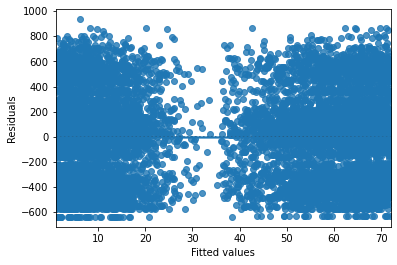

In [309]:
sns.residplot(
    x="Initial_days", y="TotalCharge", data=reduced_df, lowess=True
)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


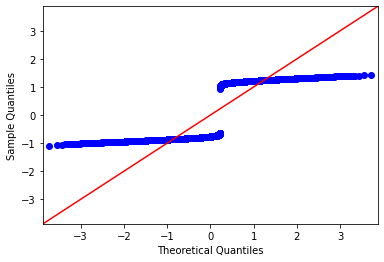

In [312]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl.resid, fit=True, line="45")

# Show the plot
plt.show()


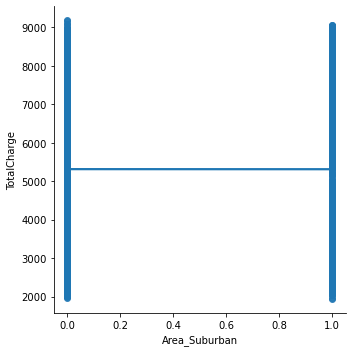

In [383]:
# fig, axes = plt.subplots(nrows=len(reduced_df.columns) // 2, ncols=2, figsize=(10,6))

# for i, col in enumerate(reduced_df.columns):
#     print(col, i)
#     if col == "TotalCharge":
#         continue
        
#     sns.lmplot(y="TotalCharge", x=col, data=reduced_df, ci=None)

# plt.show()    

sns.lmplot(y="TotalCharge", x="Area_Suburban", data=reduced_df, ci=None)

In [500]:
import statsmodels.api as sm


# display(dummy_df.corr().round(3).replace(1, "-"))

display(retained_features_df.feature.to_list())

"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Additional_charges   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          5.950e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        17:02:26   Log-Likelihood:                         -332.22
No. Observations:               10000   AIC:                                      690.4
Df Residuals:                    9987   BIC:                                      784.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Age                                    0.7043      0.002    289.008      0.000       0.700       0.709
VitD_levels                           -0.0312      0.001    -21.389      0.000      -0.034      -0.028
Doc_visits                            -0.0176      0.002     -7.811      0.000      -0.022      -0.013
Area_Suburban                         -0.0064      0.003     -2.235      0.025      -0.012      -0.001
Area_Urban                            -0.0084      0.003     -2.920      0.004      -0.014      -0.003
Gender_Male                            0.0082      0.002      3.305      0.001       0.003       0.013
Initial_admin_EmergencyAdmission       0.0308      0.003     10.156      0.000       0.025       0.037
Initial_admin_ObservationAdmission    -0.0107      0.003     -3.518      0.000      -0.017      -0.005
HighBlood_Yes                          0.6466      0.002    258.680      0.000       0.642       0.651
Stroke_Yes                             0.0206      0.003      8.241      0.000       0.016       0.026
Complication_risk_Low                 -0.0361      0.003    -12.767      0.000      -0.042      -0.031
Complication_risk_Medium              -0.0336      0.003    -11.922      0.000      -0.039      -0.028
Arthritis_Yes                         -0.0063      0.002     -2.520      0.012      -0.011      -0.001
==============================================================================
Omnibus:                      889.193   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.665
Skew:                          -0.005   Prob(JB):                     3.75e-60
Kurtosis:                       2.190   Cond. No.                         16.5
==============================================================================
"""

def get_stats(data, x_columns, y_column):
    x = data[x_columns]
    # x = x / np.std(x)
    y = data[y_column]
    # y = y / np.std(y)
    results = sm.OLS(y, x).fit()
    print("residuals", results.resid.mean())
    print(results.mse_resid)
    print(results.summary())

# x_columns = dummy_df.columns.to_list()
x_columns = retained_features_df.feature.to_list()

# for remove_col in ["Additional_charges", "Population", "Children", "Income", "VitD_levels", "Doc_visits", "Full_meals_eaten", "vitD_supp", "Area_Suburban", "Area_Urban", "Marital_Married", "Marital_NeverMarried", "Marital_Separated", "Marital_Widowed", "Gender_Nonbinary", "ReAdmis_Yes", "Soft_drink_Yes", "Initial_admin_ObservationAdmission", "Overweight_Yes", "Arthritis_Yes", "BackPain_Yes", "Allergic_rhinitis_Yes", "Asthma_Yes", "Services_CTScan", "Services_Intravenous", "Services_MRI"]:
#     x_columns.remove(remove_col)
    
print(x_columns)
# R-squared (uncentered):                   0.987
for remove_col in ["Population", "Children", "Income", "Full_meals_eaten", "vitD_supp", "Marital_Married", "Marital_NeverMarried", "Marital_Separated", "Marital_Widowed", "Gender_Nonbinary", "ReAdmis_Yes", "Soft_drink_Yes", "Overweight_Yes", "Diabetes_Yes", "Hyperlipidemia_Yes", "BackPain_Yes", "Anxiety_Yes", "Allergic_rhinitis_Yes", "Reflux_esophagitis_Yes", "Asthma_Yes", "Services_CTScan", "Services_Intravenous", "Services_MRI"]:
    x_columns.remove(remove_col)    

# x_columns.remove("Gender_Nonbinary")
# x_columns.remove("Initial_days")

x_columns
get_stats(dummy_df, x_columns, "Additional_charges")

['Population',
 'Children',
 'Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Area_Suburban',
 'Area_Urban',
 'Marital_Married',
 'Marital_NeverMarried',
 'Marital_Separated',
 'Marital_Widowed',
 'Gender_Male',
 'Gender_Nonbinary',
 'ReAdmis_Yes',
 'Soft_drink_Yes',
 'Initial_admin_EmergencyAdmission',
 'Initial_admin_ObservationAdmission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Overweight_Yes',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Anxiety_Yes',
 'Allergic_rhinitis_Yes',
 'Reflux_esophagitis_Yes',
 'Asthma_Yes',
 'Services_CTScan',
 'Services_Intravenous',
 'Services_MRI']

['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_NeverMarried', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_EmergencyAdmission', 'Initial_admin_ObservationAdmission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CTScan', 'Services_Intravenous', 'Services_MRI']
residuals -20.566872969812543
2681662.08350675
                                 OLS Regression Results                                
Dep. Variable:     Additional_charges   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:        

### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.
*The submission accurately discusses the summary statistics and discusses the target variable and all predictor variables that need to be gathered from the data set to answer the selected research question.*

### Target Variable
- mean, min, max, mode, range, distribution shape, variance, std dev

### Predictor Variables
- mean, min, max, mode, range, distribution shape, variance, std dev

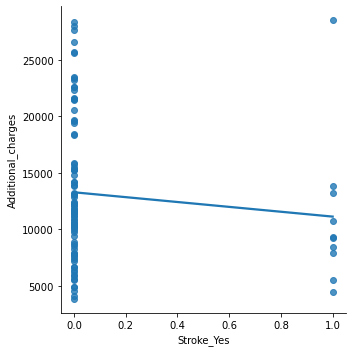

In [494]:
x_feature = "Stroke_Yes"

sns.lmplot(x=x_feature, y="Additional_charges", data=dummy_df.sample(100), ci=None)

### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.
*The submission explains all necessary steps used to prepare the data for the analysis. The steps include the annotated code and relate to preparing for a multiple regression analysis.*



### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.
*The submission accurately generates both univariate and bivariate visualizations of the distributions of variables in the cleaned data set. The bivariate visualizations include the target variable.*


### Univariate Visualizations
-

In [508]:
display("Data Summary", pd.DataFrame(df.Additional_charges.describe()))

'Data Summary'

,Additional_charges
count,10000.000000
mean,12934.528587
std,6542.601544
min,3125.703000
25%,7986.487755
50%,11573.977735
75%,15626.490000
max,30566.070000


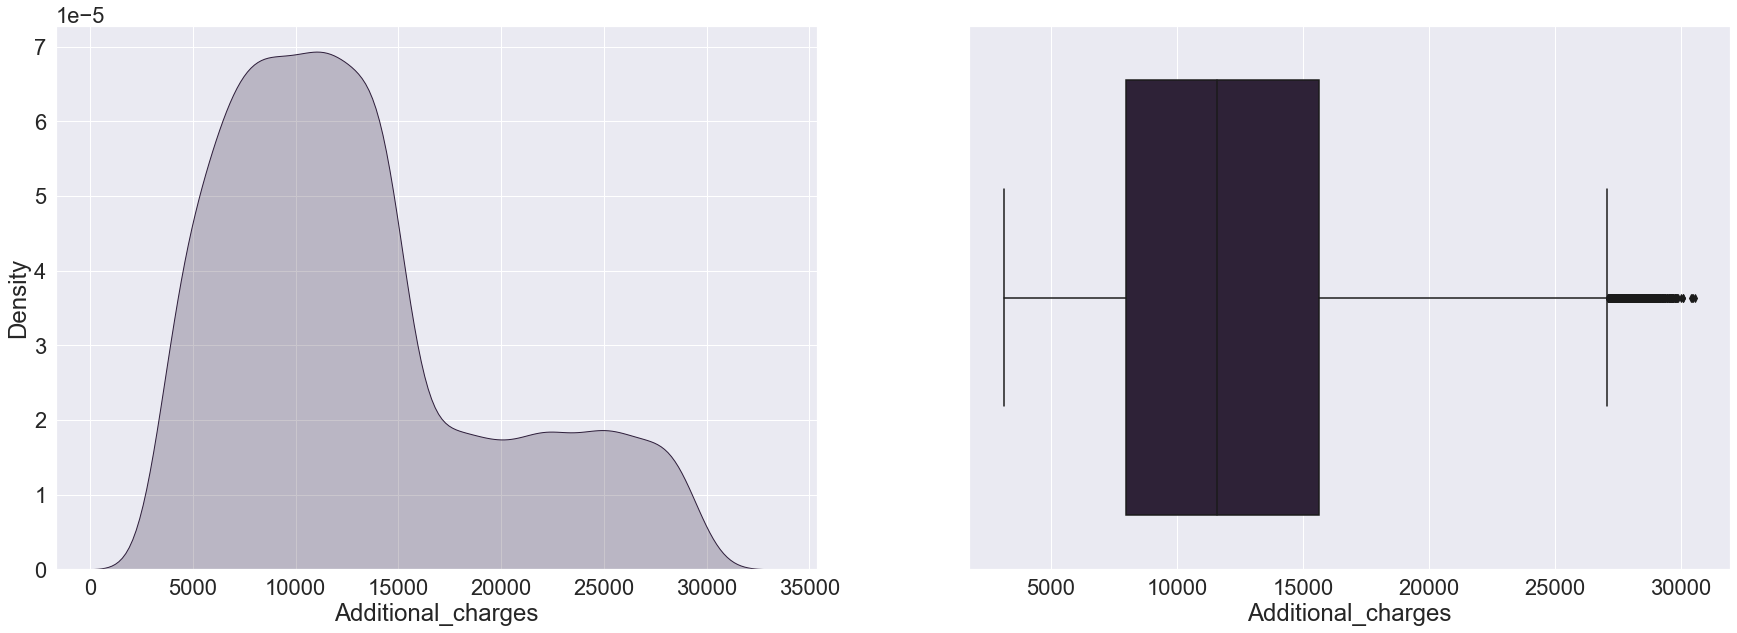

In [507]:
fig, axs = plt.subplots(ncols=2, figsize=(30,10))

_ = sns.kdeplot(data=df, x="Additional_charges", ax=axs[0], fill=True)
_ = sns.boxplot(data=df, x="Additional_charges", ax=axs[1])

# plt.savefig('UNIVARIATE_Additional_charges.png', format="png")

### Bivariate Visualizations

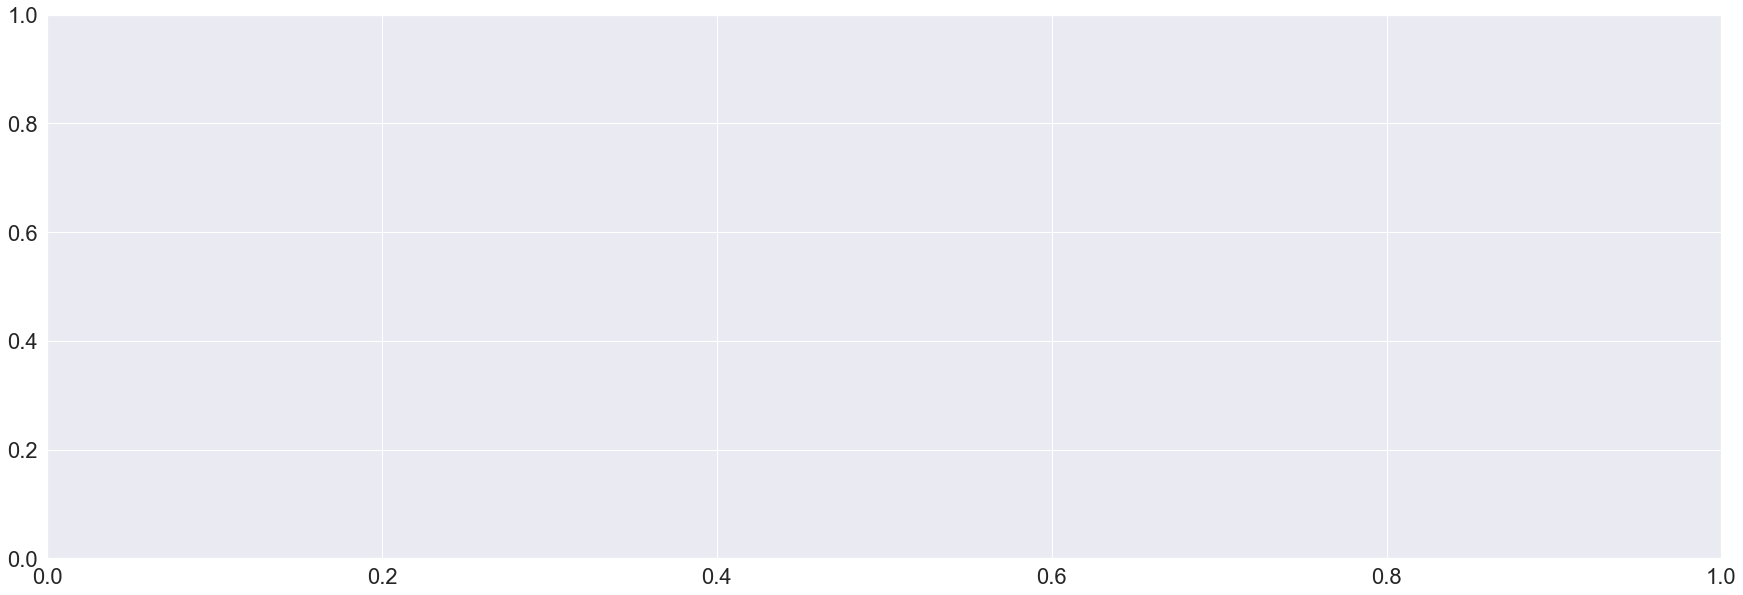

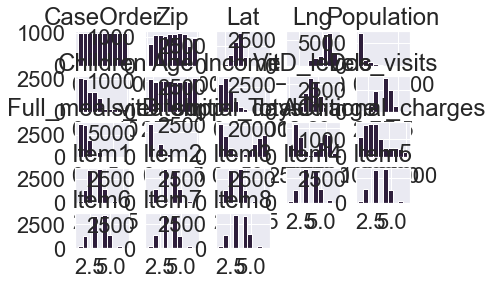

In [512]:
fig, axs = plt.subplots(figsize=(30,10))
_ = df.hist()

### 5.  Provide a copy of the prepared data set.
*The submission provides a copy of the fully prepared data set.*



# Part IV: Model Comparison and Analysis
---

## D.  Compare an initial and a reduced multiple regression model by doing the following:



### 1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.
*The submission provides an accurate initial multiple regression model from all predictors identified in Part C2.*


In [ ]:
# TODO: OLS fit

### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.
*The submission justifies a statistically based variable selection procedure and a model evaluation metric to reduce the initial model. The justification is in alignment with the research question.*



- Multicollinearity / Variance Inflation Factor(VIF)
- RFE
- Forward stepwise variable selection
    - "From this iteration, we incorporated stepwise regression to assist us in dimensionality reduction not only to produce a simpler and more effective model, but to derive insights in our data."
    - "We continue this process until all p-values are below 0.05."
- Max, You should include p-values in your feature selection/model-reduction. And, you should include another method like RFE or stepwise. Use the RFECV method in Sklearn to use cross-validation for selecting the ideal number of features for RFE. Here is a good article on stepwise with linear regression using Python

### 3.  Provide a reduced multiple regression model that includes both categorical and continuous variables. (Note: The output should include a screenshot of each model.)
*The submission provides a reduced multiple regression model that includes both categorical and continuous variables, and the reduced model is in alignment with the justification from part D2.*



In [ ]:
# TODO: OLS fit with reduced model

## E.  Analyze the data set using your reduced multiple regression model by doing the following:



### 1.  Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
*The submission accurately explains the data analysis process by comparing the initial and reduced multiple regression models, including all of the given elements.*

- the logic of the variable selection technique

- the model evaluation metric

- a residual plot

#### A. the logic of the variable selection technique

#### B. the model evaluation metric

- R Squared
- R Squared Adjusted
- P values

#### C. a residual plot

- rsquared
    - "The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs."
    - "The value 𝑅² = 1 corresponds to SSR = 0, that is to the perfect fit since the values of predicted and actual responses fit completely to each other."
- rsquared adjusted (penalize for more explan. vars)
    - a model is good when Adjusted R^2 is close to R^2
- residual standard error
- 2D scatterplot with hue
- fit model with interaction between explantory variables
- parallel slopes regression
- create random predictions and visualize them on the trend lines
- predictor insight graphs (discretize for continous variables)
- QQ Plot (see whether residuals follow normal distribution) to determine if a model is a good fit

### 2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error. (Note: The output should include the predictions from the refined model you used to perform the analysis.)
*The submission provides the accurate output and calculations of the analysis performed, including the model’s residual error. The submissions includes all necessary output and calculations.*
<br />*Your model will be a mathematical formula that can be used to predict your dependent variable. The note is asking you to provide the output from that prediction. A sample output of 10 to 20 rows of data should be sufficient.*



In [514]:
pd.DataFrame(mdl.resid)

,0
0,4609.701097
1,4171.514801
2,5107.921231
3,-270.694595
4,-8296.945171
...,...
9995,-3652.193097
9996,15617.602281
9997,2061.243806
9998,-5532.093331


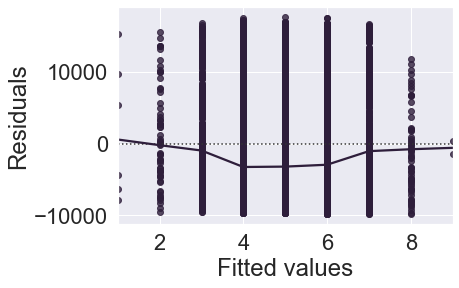

In [515]:
# Plot the residuals vs. fitted values
# Plot the residuals of a linear regression.

# This function will regress y on x (possibly as a robust or polynomial regression) and then draw a scatterplot of the residuals. You can optionally fit a lowess smoother to the residual plot, which can help in determining if there is structure to the residuals.
sns.residplot(
    x="Doc_visits", y="Additional_charges", data=dummy_df, lowess=True
)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()


/Users/chris/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


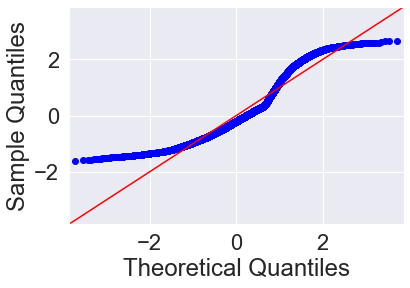

In [518]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl.resid, fit=True, line="45")

# Show the plot
plt.show()


### 3.  Provide the code used to support the implementation of the multiple regression models.
*The submission provides the code used to support the implementation of the multiple regression models, and the code is complete and accurate.*


# Part V: Data Summary and Implications
---


## F.  Summarize your findings and assumptions by doing the following:



### 1.  Discuss the results of your data analysis, including the following elements:
*The submission accurately discusses the results of the data analysis, and the discussion addresses all of the given elements and is in alignment with the research question and the data analysis.*
- a regression equation for the reduced model

- an interpretation of coefficients of the statistically significant variables of the model

- the statistical and practical significance of the model

- the limitations of the data analysis


-

## 2.  Recommend a course of action based on your results.
*The submission recommends an appropriate course of action based on the results as they relate to the research question.*


# Part VI: Demonstration
---

## H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.
*The submission lists all web sources used to acquire data or segments of third-party code, and the web sources are reliable.*



- https://realpython.com/linear-regression-in-python/
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922
- https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
- https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/
- https://seaborn.pydata.org/generated/seaborn.lmplot.html
- https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandashttps://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

## I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*

